# Berkeley Data Analytics Bookcamp – Project 1

## Cryptocurrency

### An Eagle's Eye View – David

### Top 10s – Josefina

In [12]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
from config import api_key
from datetime import datetime

In [13]:
#Looked for the information in Crypto Compare. Build the url for both requests. 
urlmktcap=f"https://min-api.cryptocompare.com/data/top/mktcapfull?limit=10&tsym=USD&api_key={api_key}"
urlvolume=f"https://min-api.cryptocompare.com/data/top/totalvolfull?limit=10&tsym=USD&api_key={api_key}"

In [14]:
#For the first analysis: get the information with json format, and isolates data items for easy reading
responsemktcap=requests.get(urlmktcap).json()
datamktcap=responsemktcap["Data"]

In [15]:
#Obtain the names of the top 10 main currencies considering Market Capitalization. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_mktcap_list=[]
price_mktcap_list=[]
mktcap_list=[]
for index in indexes:
    name=datamktcap[index]["CoinInfo"]["FullName"]
    price=datamktcap[index]["RAW"]["USD"]["PRICE"]
    mktcap=datamktcap[index]["RAW"]["USD"]['MKTCAP']
    name_mktcap_list.append(name)
    price_mktcap_list.append(price)
    mktcap_list.append(mktcap)

In [16]:
#Create a DataFrame with the information obtained.
mktcap_df1=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})

In [17]:
#Format the columns and present the data.
mktcap_df1=mktcap_df1.sort_values(by='Market Capitalization', ascending=False)
mktcap_df1["Price"] = mktcap_df1["Price"].map("${:,.2f}".format)
mktcap_df1["Market Capitalization"] = mktcap_df1["Market Capitalization"].map("${:,.2f}".format)
mktcap_df1

,Cryptocurrency,Price,Market Capitalization
0,Bitcoin,"$22,914.54","$441,749,778,899.22"
1,Ethereum,"$1,573.71","$192,580,977,005.61"
2,Tether,$1.00,"$67,811,335,333.20"
3,Binance Coin,$311.06,"$50,788,935,728.41"
4,USD Coin,$1.00,"$42,398,660,541.24"
5,XRP,$0.41,"$40,505,600,692.18"
6,Aptos,$16.68,"$16,973,733,946.28"
7,BUSD,$1.00,"$16,091,152,315.80"
8,Dogecoin,$0.10,"$13,119,390,820.09"
9,Cardano,$0.39,"$13,090,410,979.71"


<function matplotlib.pyplot.show(close=None, block=None)>

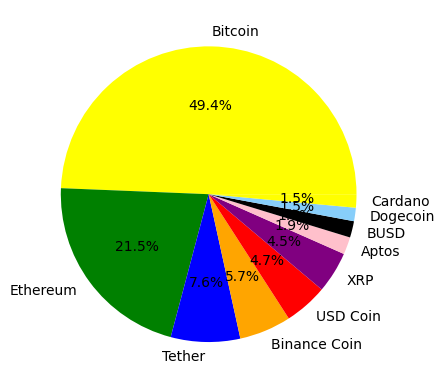

In [18]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's market capitalization.
mktcap_df=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(mktcap_df["Market Capitalization"], labels=mktcap_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")
# Save an image of the chart and print the final product to the screen
plt.savefig("Images/PieMktCap.png")
plt.show

In [19]:
#For the second analysis: get the information with json format, and isolates data items for easy reading
responsevolume=requests.get(urlvolume).json()
datavolume=responsevolume["Data"]

In [20]:
#Obtain the names of the top 10 main currencies considering 24-hour trading volume. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_volume_list=[]
price_volume_list=[]
volume_list=[]
for index in indexes:
    name_v=datavolume[index]["CoinInfo"]["FullName"]
    price_v=datavolume[index]["RAW"]["USD"]["PRICE"]
    volume=datavolume[index]["RAW"]["USD"]['VOLUME24HOUR']
    name_volume_list.append(name_v)
    price_volume_list.append(price_v)
    volume_list.append(volume)

In [21]:
#Create a DataFrame with the information
volume_df1=pd.DataFrame({
    "Cryptocurrency":name_volume_list,
    "Price":price_volume_list,
    "Volume":volume_list
})

In [22]:
#Format the columns
volume_df1=volume_df1.sort_values(by='Volume',ascending=False)
volume_df1["Price"] = volume_df1["Price"].map("${:,.2f}".format)
volume_df1["Volume"] = volume_df1["Volume"].map("{:,.2f}".format)
volume_df1

,Cryptocurrency,Price,Volume
3,Dogecoin,$0.10,"1,406,475,108.73"
5,Tether,$1.00,"264,320,885.41"
4,XRP,$0.41,"149,493,881.39"
7,Highstreet,$3.73,"3,883,460.25"
9,Mask Network,$4.18,"2,805,607.74"
2,BUSD,$1.00,"996,480.61"
6,Litecoin,$93.03,"635,986.58"
8,Aptos,$16.66,"467,399.50"
1,Ethereum,"$1,573.43","418,835.05"
0,Bitcoin,"$22,906.99","47,333.48"


<function matplotlib.pyplot.show(close=None, block=None)>

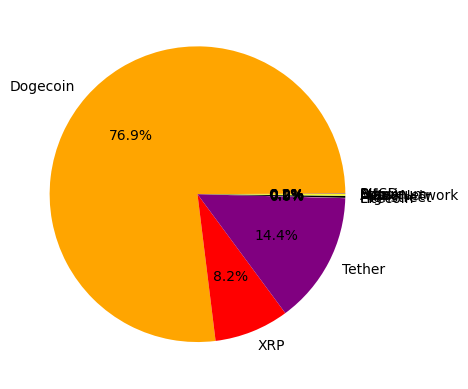

In [23]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's volumen trade in the past 24 hours.
volume_df=pd.DataFrame({
    "Cryptocurrency":name_volume_list,
    "Price":price_volume_list,
    "Volume":volume_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(volume_df["Volume"], labels=volume_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")

# Save an image of the chart and print the final product to the screen
plt.savefig("Images/Pievolume.png")
plt.show

In [24]:
#Historical information for Doge coin
urldoge="https://min-api.cryptocompare.com/data/v2/histoday?fsym=DOGE&tsym=USD&limit=30"
#For the third analysis: get the information with json format, and isolates data items for easy reading
responsedoge=requests.get(urldoge).json()
datadoge=responsedoge["Data"]["Data"]

In [25]:
#Obtain the volume trade for the last 30 days. Create a list for the time and volume. 
indexes=range(0,30)
doge_time_list=[]
doge_volumeto_list=[]
doge_volumefrom_list=[]
for index in indexes:
    doge_time=datetime.fromtimestamp(datadoge[index]["time"])
    doge_volumeto=datadoge[index]["volumeto"]
    doge_volumefrom=datadoge[index]["volumefrom"]
    doge_time_list.append(doge_time)
    doge_volumeto_list.append(doge_volumeto)
    doge_volumefrom_list.append(doge_volumefrom)

In [26]:
#Create a DataFrame with the information
doge_df1=pd.DataFrame({
    "Time":doge_time_list,
    "Volume To":doge_volumeto_list,
    "Volume From":doge_volumefrom_list
})

In [27]:
#Format the columns
doge_df1["Time"] = pd.to_datetime(doge_df1["Time"],format=("MM-DD-YYYY"))
#doge_df1["Volume To"] = doge_df1["Volume To"].map("{:,.2f}".format)
#doge_df1["Volume From"] = doge_df1["Volume From"].map("{:,.2f}".format)
#doge_df1

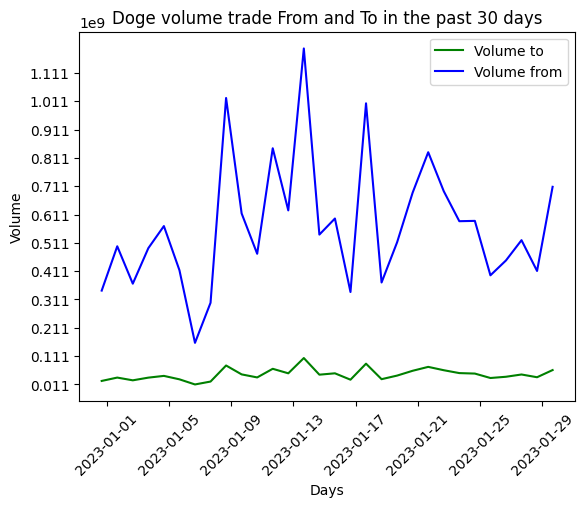

In [28]:
plt.plot(doge_df1["Time"],doge_df1["Volume To"],color="green", label="Volume to")
plt.plot(doge_df1["Time"],doge_df1["Volume From"],color="blue", label="Volume from")

plt.title("Doge volume trade From and To in the past 30 days")
plt.xlabel("Days")
plt.ylabel("Volume")
plt.legend()
plt.xticks(rotation =45)
plt.locator_params(axis='y', nbins=50)
plt.yticks(np.arange(min(doge_df1["Volume To"]), max(doge_df1["Volume From"])+100, 100000000))
plt.savefig("Images/linechartdoge.png")
plt.show()

### Narrowing in on Bitcoin and Ethereum – Tristian